In [19]:
using Distributions

n = 100
X = [rand(1:6) for i = 1:n]
X̄ =  mean(X)
σ̄ = std(X,corrected=true)
N = Normal(X̄,σ̄/sqrt(n))
quantile(N,0.025),quantile(N,0.975)



1.3333333333333333

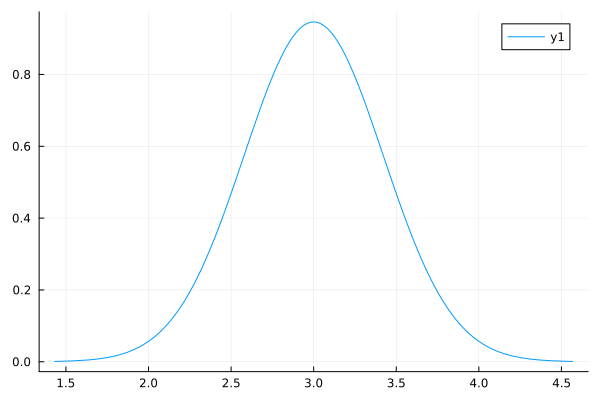

In [20]:
using StatsPlots

N = Normal(X̄,σ̄/sqrt(n))

plot(N)

In [21]:
quantile(N,0.025),quantile(N,0.975)

(2.173606623593916, 3.8263933764060836)

In [ ]:
plot()

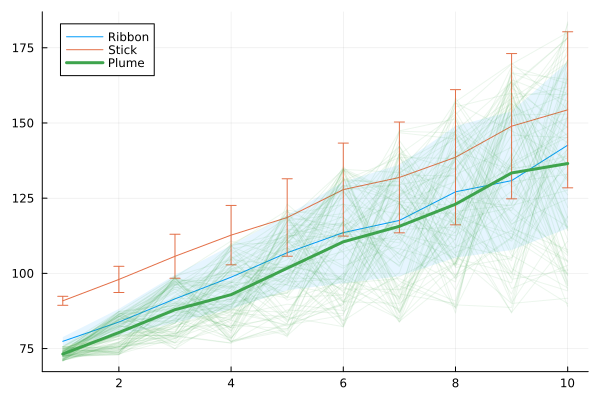

In [22]:
x = 1:10
y = fill(NaN, 10, 100, 3)
for i = axes(y,3)
    y[:,:,i] = collect(1:2:20) .+ rand(10,100).*5 .* collect(1:2:20) .+ rand()*100
end

errorline(1:10, y[:,:,1], errorstyle=:ribbon, label="Ribbon")
errorline!(1:10, y[:,:,2], errorstyle=:stick, label="Stick", secondarycolor=:matched)
errorline!(1:10, y[:,:,3], errorstyle=:plume, label="Plume")

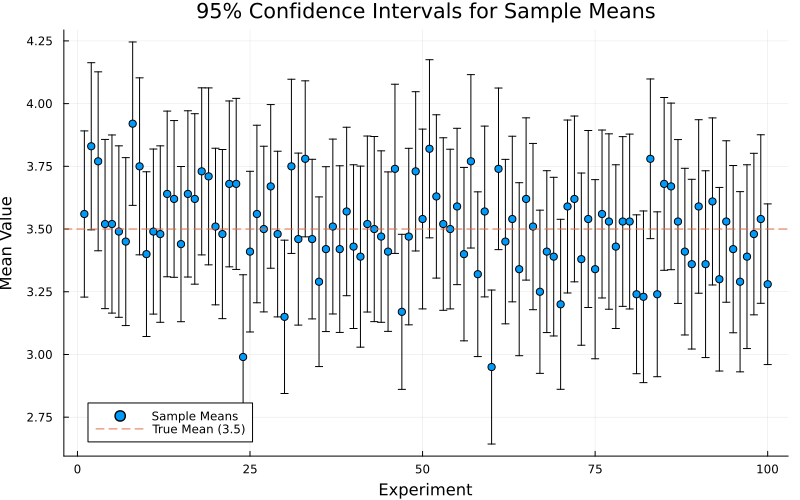

In [44]:
using Random
using Statistics
using Distributions
using Plots

# サンプル数
n = 100

# 実験回数
num_experiments = 100

# 真の平均
true_mean = 3.5

# 平均と信頼区間を格納する配列の初期化
means = zeros(num_experiments)
conf_intervals = zeros(num_experiments, 2)

# 実験を実行
for i in 1:num_experiments
    # 一様分布から n 個のサンプルを生成
    X = [rand(1:6) for _ in 1:n]
    X̄ = mean(X)
    σ̄ = std(X, corrected=true)
    N = Normal(X̄, σ̄/sqrt(n))
    
    # 平均と信頼区間を格納
    means[i] = X̄
    conf_intervals[i, :] .= (quantile(N, 0.025), quantile(N, 0.975))
end

# プロット
scatter(1:num_experiments, means, yerr=(means .- conf_intervals[:, 1], conf_intervals[:, 2] .- means), label="Sample Means",size=(800,500))
hline!([true_mean], linestyle=:dash, label="True Mean (3.5)")
xlabel!("Experiment")
ylabel!("Mean Value")
title!("95% Confidence Intervals for Sample Means")

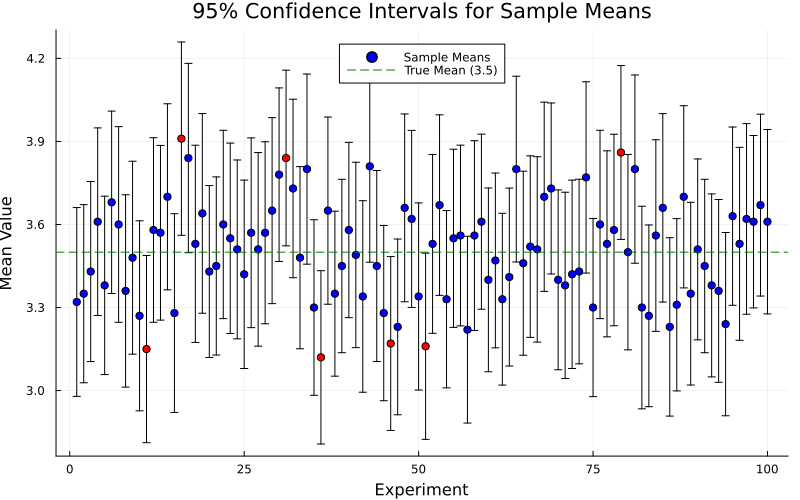

┌ Warning: Indices Base.OneTo(100) of attribute `seriescolor` does not match data indices 2:300.
└ @ Plots /Users/shimizudan/.julia/packages/Plots/a3u1v/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `seriescolor` vector do not match data indices.
│ If you intend elements of `seriescolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, and use a row vector for `seriescolor`. Legend entries
│ may be suppressed by passing an empty label.
│ For example,
│     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], seriescolor=[1 2])
└ @ Plots /Users/shimizudan/.julia/packages/Plots/a3u1v/src/utils.jl:143
┌ Warning: Indices Base.OneTo(100) of attribute `fillcolor` does not match data indices 2:300.
└ @ Plots /Users/shimizudan/.julia/packages/Plots/a3u1v/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `fillcolor` vector do not match data indices.
│ If you intend elements of `fi

In [47]:
using Random
using Statistics
using Distributions
using Plots

# サンプル数
n = 100

# 実験回数
num_experiments = 100

# 真の平均
true_mean = 3.5

# 平均と信頼区間を格納する配列の初期化
means = zeros(num_experiments)
conf_intervals = zeros(num_experiments, 2)

# 信頼区間に真の平均が含まれているかどうかのフラグ配列
contains_true_mean = trues(num_experiments)

# 実験を実行
for i in 1:num_experiments
    # 一様分布から n 個のサンプルを生成
    X = [rand(1:6) for _ in 1:n]
    X̄ = mean(X)
    σ̄ = std(X, corrected=true)
    N = Normal(X̄, σ̄/sqrt(n))
    
    # 平均と信頼区間を格納
    means[i] = X̄
    conf_intervals[i, :] .= (quantile(N, 0.025), quantile(N, 0.975))
    
    # 信頼区間に真の平均が含まれているかどうかをチェック
    contains_true_mean[i] = conf_intervals[i, 1] <= true_mean <= conf_intervals[i, 2]
end

# プロット
colors = [contains_true_mean[i] ? :blue : :red for i in 1:num_experiments]
scatter(1:num_experiments, means, yerr=(means .- conf_intervals[:, 1], conf_intervals[:, 2] .- means), 
        label="Sample Means", size=(800, 500), 
        legend=:top, color=colors)
hline!([true_mean], linestyle=:dash, label="True Mean (3.5)", color=:green)
xlabel!("Experiment")
ylabel!("Mean Value")
title!("95% Confidence Intervals for Sample Means")

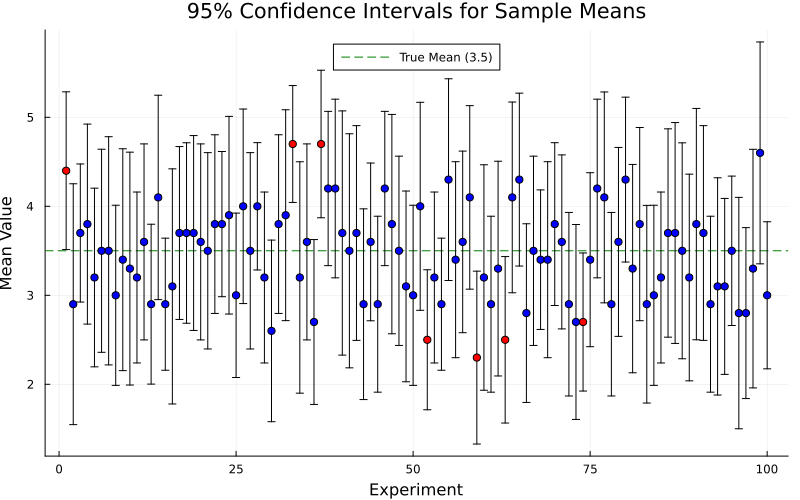

In [50]:
using Random
using Statistics
using Distributions
using Plots

# サンプル数
n = 10

# 実験回数
num_experiments = 100

# 真の平均
true_mean = 3.5

# 平均と信頼区間を格納する配列の初期化
means = zeros(num_experiments)
conf_intervals = zeros(num_experiments, 2)

# 信頼区間に真の平均が含まれているかどうかのフラグ配列
contains_true_mean = trues(num_experiments)

# 実験を実行
for i in 1:num_experiments
    # 一様分布から n 個のサンプルを生成
    X = [rand(1:6) for _ in 1:n]
    X̄ = mean(X)
    σ̄ = std(X, corrected=true)
    N = Normal(X̄, σ̄/sqrt(n))
    
    # 平均と信頼区間を格納
    means[i] = X̄
    conf_intervals[i, :] .= (quantile(N, 0.025), quantile(N, 0.975))
    
    # 信頼区間に真の平均が含まれているかどうかをチェック
    contains_true_mean[i] = conf_intervals[i, 1] <= true_mean <= conf_intervals[i, 2]
end

# プロットの初期化
plot(size=(800, 500), legend=:top)
hline!([true_mean], linestyle=:dash, label="True Mean (3.5)", color=:green)

# 各実験のデータをプロット
for i in 1:num_experiments
    color = contains_true_mean[i] ? :blue : :red
    scatter!([i], [means[i]], yerr=([means[i] - conf_intervals[i, 1]], [conf_intervals[i, 2] - means[i]]), color=color, label=false)
end

xlabel!("Experiment")
ylabel!("Mean Value")
title!("95% Confidence Intervals for Sample Means")

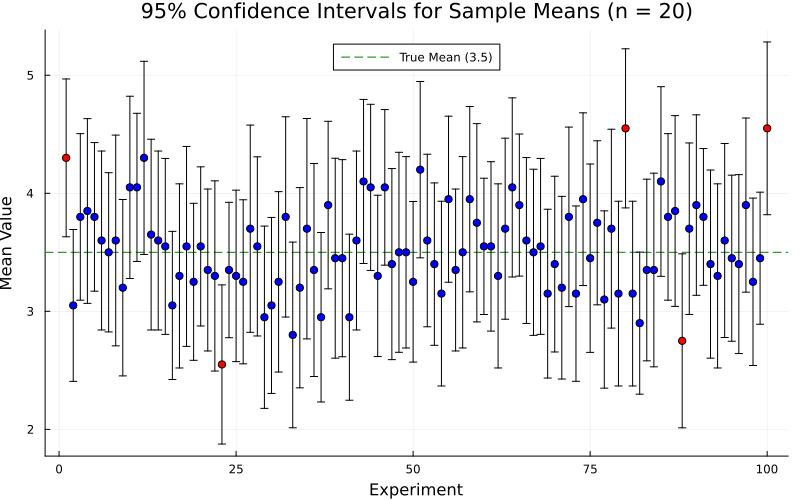

In [65]:
using Random
using Statistics
using Distributions
using Plots

# サンプル数
n = 20

# 実験回数
num_experiments = 100

# 真の平均
true_mean = 3.5

# 平均と信頼区間を格納する配列の初期化
means = zeros(num_experiments)
conf_intervals = zeros(num_experiments, 2)

# 信頼区間に真の平均が含まれているかどうかのフラグ配列
contains_true_mean = trues(num_experiments)

# 実験を実行
for i in 1:num_experiments
    # 一様分布から n 個のサンプルを生成
    X = [rand(1:6) for _ in 1:n]
    X̄ = mean(X)
    σ̄ = std(X, corrected=true)
    N = Normal(X̄, σ̄/sqrt(n))
    
    # 平均と信頼区間を格納
    means[i] = X̄
    conf_intervals[i, :] .= (quantile(N, 0.025), quantile(N, 0.975))
    
    # 信頼区間に真の平均が含まれているかどうかをチェック
    contains_true_mean[i] = conf_intervals[i, 1] <= true_mean <= conf_intervals[i, 2]
end

# プロットの初期化
plot(size=(800, 500), legend=:top)
hline!([true_mean], linestyle=:dash, label="True Mean (3.5)", color=:green)

# 各実験のデータをプロット
for i in 1:num_experiments
    color = contains_true_mean[i] ? :blue : :red
    scatter!([i], [means[i]], yerr=([means[i] - conf_intervals[i, 1]], [conf_intervals[i, 2] - means[i]]), color=color, label=false)
end

xlabel!("Experiment")
ylabel!("Mean Value")
title!("95% Confidence Intervals for Sample Means (n = $n)")

1. サイコロを20回振って，平均と標準偏差を求め，95%の信頼区間を作る。
2. この信頼区間を100個作る。
3. 真の平均3.5を含む信頼区間はだいたい100個中95個（信頼度95%）
